In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

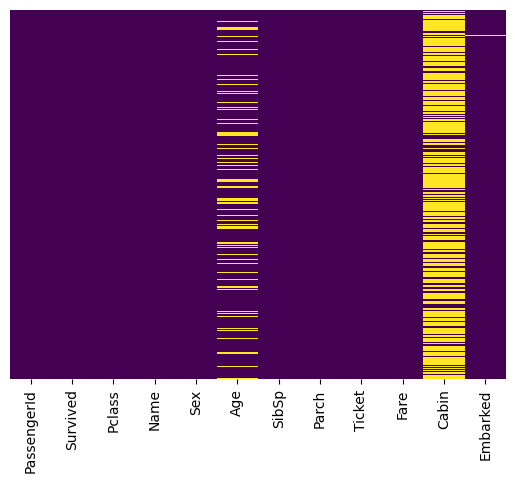

In [4]:
#now we need to make a heatmap with isnull to do explotary data to see where is our data missing
sns.heatmap(train.isnull(),yticklabels = False,cbar =False, cmap = 'viridis')


In [5]:
#from this I know that we are missing some age info and cabin info. like how we can use POWERBI to 
#analyse better


In [6]:
sns.set_style('whitegrid')


<AxesSubplot:xlabel='Survived', ylabel='count'>

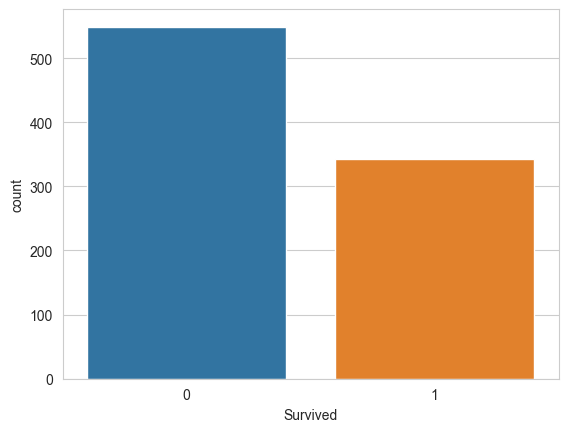

In [7]:
#compared to linear regression for distribution and correlation of main features and overall feature 
#for logistic regression, we would want to see the ratio of just the main feature of labels 1,0
sns.countplot(x = 'Survived',data = train)

In [8]:
#from the graph we can see that there is quite alot of people that did not survived compared to the ones that survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

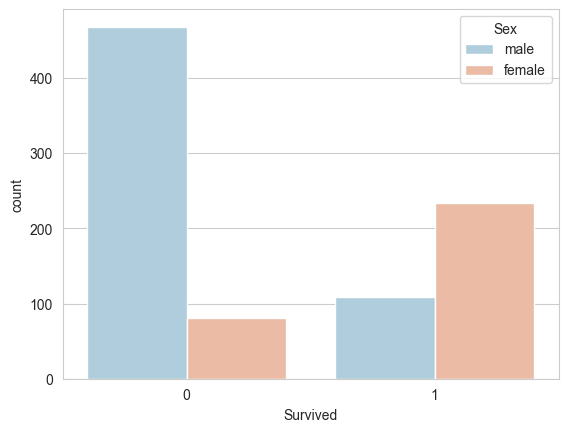

In [9]:
#after that we compare our main label y with other features to see how they correlation 
#with countplot 
sns.countplot(x = 'Survived', data = train, hue = 'Sex',palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

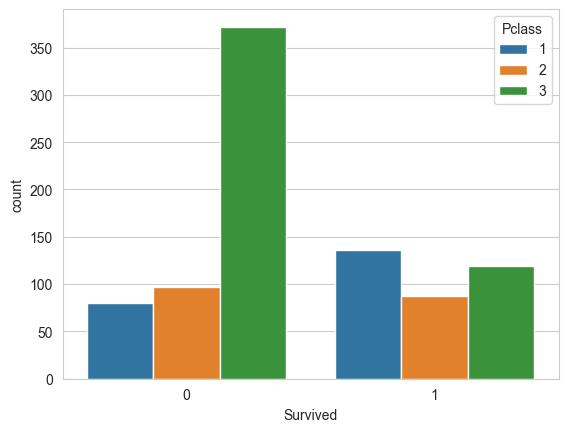

In [10]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

In [11]:
#based on the graph those that did survive tend to be from those from class 1,2
#STUDY ON THE DISTRUBTIONS OF different features 

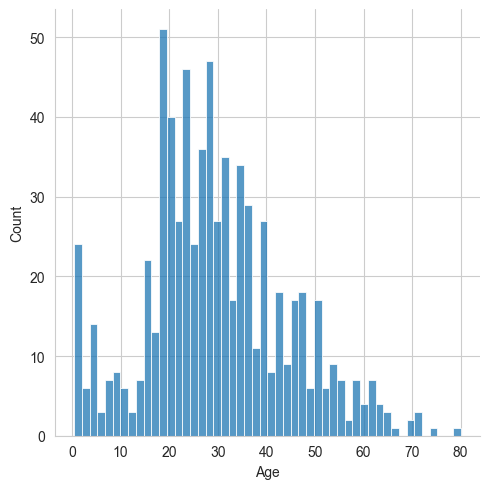

In [12]:
#so right now we also want to see the distribution of the ages with our null values not inside 

sns.displot(train['Age'].dropna(),bins = 50)

In [13]:
#we have a bimodal distribution with two peaks,whereby we have quite alot of passengers
#below 8-10 and as we go forward, we have quite an average age of 20 to 30. 
#the older the lesser distribution

<AxesSubplot:xlabel='SibSp', ylabel='count'>

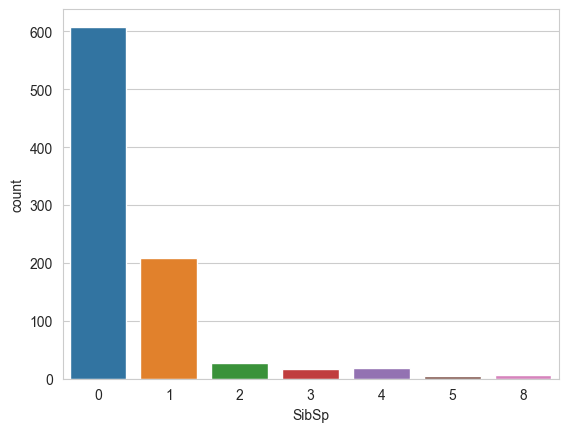

In [14]:
#wanted to search up distribution of SibSp
sns.countplot(x = 'SibSp', data = train)

In [15]:
#based on that interesting that people do not have a sibling or children on board 
#probably most of them are single and how the age distribution had shown that it is 
#mostly youths and teenagers

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
train['Fare'].iplot(kind = 'hist', bins = 30)
#these make sense because there is alot of people who bought 3rd class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

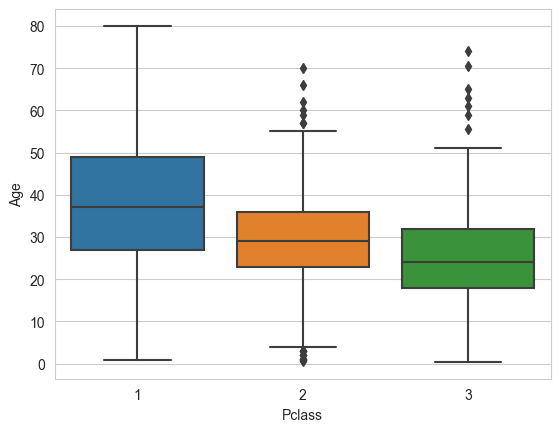

In [19]:
#SINCE WE had used isnull heatmap to find out brief analysis of our missing data in our dataset
#and how we would want to use imputation to fill in the empty values
#Boxplot is one way to the analyse to do our imputation of missing data 
sns.boxplot(x = 'Pclass', y = 'Age',data = train)

In [20]:
#since we can see that those in 1st class tend to be in the older category feature
#

In [21]:
def impute_age(cols):
    #I am able to ge the index[0] and cols[1] because I am applying on these two columns
    #train['age',pclass]
    Age = cols[0]
    Pclass = cols[1]
    #if df[age] is null
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass ==3:
            return 24
    else:
        return Age

In [22]:
#to apply to columns
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)


<AxesSubplot:>

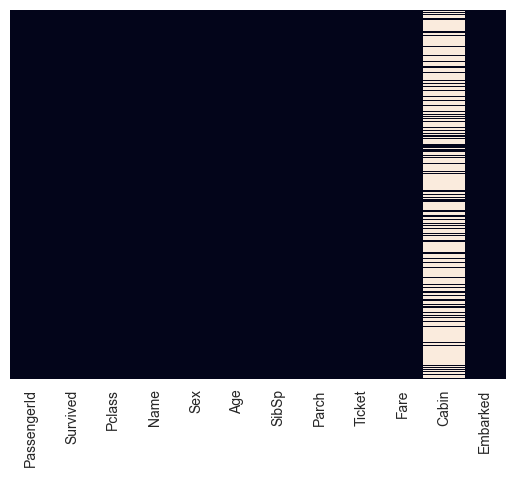

In [23]:
#now we will re-evaulate the distribution of null data in new dataset, without showing the 
#colorbar
sns.heatmap(train.isnull(), yticklabels = False,cbar = False)


In [24]:
#too much missing info, so gonna drop the columns
#train.drop('Cabin',axis = 1,inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#NOW my dataset has no missing values, it is cleaned data
#next we need to convert the categorical data into dummy variable (0 or 1)
#which we will do on the 'Sex' & 'Embark' as they are categorical string data 

In [26]:
sex = pd.get_dummies(train['Sex'],drop_first = True) #drop first is to ensure we don't get the algorithm wrong


In [27]:
embark = pd.get_dummies(train['Embarked'],drop_first=True) 

In [28]:
embark.head() #so now it is not perfect predictors of each other for the get dummies function

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
#after creating dummies for our categorical variables, we have to concat
train = pd.concat([train,sex,embark],axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [30]:
#so now we can drop those columns as mentioned for better and simpler machine learning

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [75]:
#the passengerID does not really help as it is just the index in our ML
#NOW WE are jsut left with our useful features and label
train.drop(["PassengerId","Sex","Name","Embarked","Ticket"],axis = 1,inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,1,1,38.0,1,0,71.2833,C85,0,0,0
2,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,35.0,1,0,53.1000,C123,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [97]:
#train.drop("Cabin",axis = 1,inplace = True)
train.head()
#after analysis the relationships of certain catgory and cleaning and filling of dataset
# we can now start to train our model 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [98]:
X=train.drop('Survived',axis = 1)
y= train['Survived']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 101) 

In [101]:
#SAME THING just create and fit
from sklearn.linear_model import LogisticRegression

In [102]:
logmodel = LogisticRegression()
logmodel.get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

In [103]:
logmodel.fit(X_train,y_train)

c:\Users\Ryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [104]:
predictions = logmodel.predict(X_test)

In [105]:
#so we dont have to read of a confusion matrix
#instead of scatterplot for regression
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

